#Assigment 1: Data Analytics by Shukri

##Installation & library

In [ ]:
pip install quandl

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import quandl as qndl
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
drive.mount('/content/drive')

##Task 1 : Linear Regression

###Action 1: Initial Analysis of the DataFrame

In [ ]:
# Initial Analysis
symbol = "WIKI/AAPL"
qndl.ApiConfig.api_key = "C3Pgk2SrUJ3v2Myi99oB"
df = qndl.get(symbol)
df.to_csv("apple_stock.csv", index=False)


In [ ]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [ ]:
# Potential features to predict "Close" value
# Drop 'Close' because it's the target variable we want to predict.
# Drop 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume' because they provide similar information
# as their non-adjusted counterparts, leading to potential redundancy.
features = df.drop(columns=['Close', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume', 'Ex-Dividend',	'Split Ratio']).columns
df[features]

,Open,High,Low,Volume
Date,,,,
1980-12-12,28.75,28.87,28.75,2093900.0
1980-12-15,27.38,27.38,27.25,785200.0
1980-12-16,25.37,25.37,25.25,472000.0
1980-12-17,25.87,26.00,25.87,385900.0
1980-12-18,26.63,26.75,26.63,327900.0
...,...,...,...,...
2018-03-21,175.04,175.09,171.26,35247358.0
2018-03-22,170.00,172.68,168.60,41051076.0
2018-03-23,168.39,169.92,164.94,40248954.0


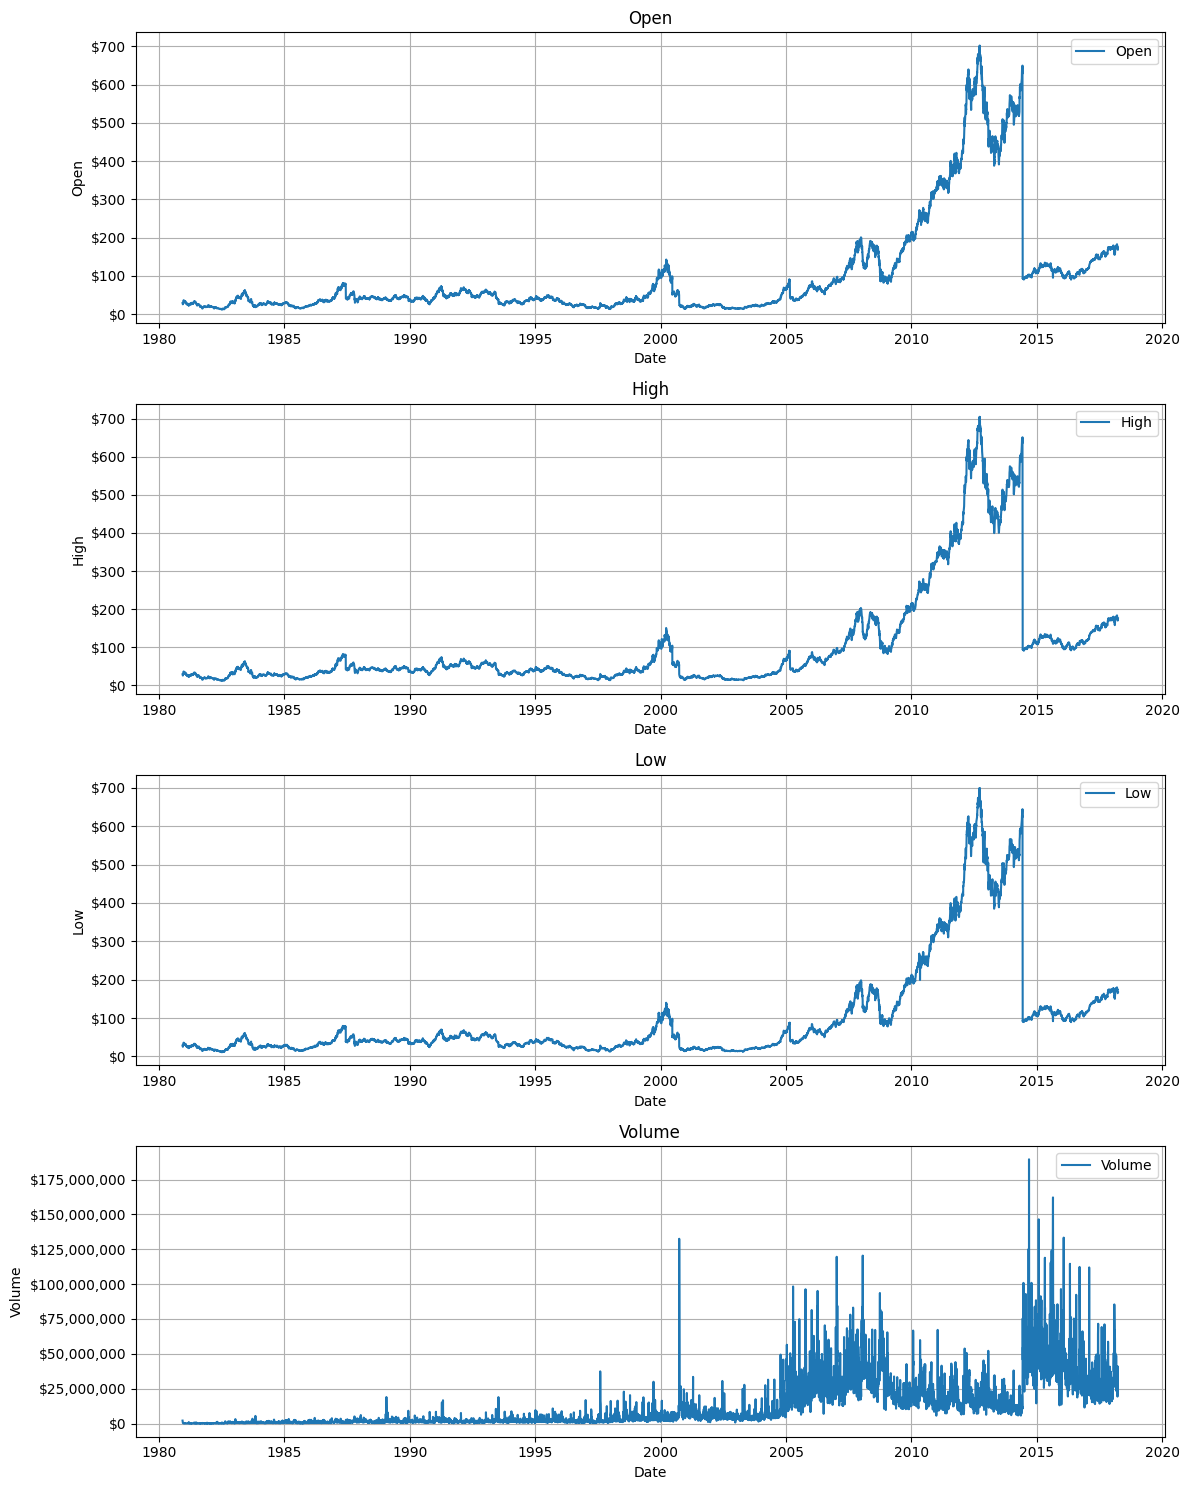

In [ ]:
# Visualize the feutures
subset_data = df[features]

fig, axes = plt.subplots(nrows=len(features), figsize=(12, 15))

for i, col in enumerate(features):
    axes[i].plot(subset_data[col], label=col)
    axes[i].set_title(col)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(col)
    axes[i].grid(col)
    axes[i].legend()
    # Set y-axis format to dollar
    axes[i].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

plt.tight_layout()
plt.show()


#### Action 2: Separate the data into Features (X) and response variable (y)

In [ ]:
X = df.drop(columns=['Close'])  # Features
y = df['Close']  # Response Variable

###Action 3: Scatter plot for OPEN vs CLOSE

In [ ]:
plt = px.scatter(df, x="Open", y="Close")
# Add a title to the graph
plt.update_layout(title='Scatter Plot of OPEN vs CLOSE')
plt.show()

### Action 4: Correlation between each feature and CLOSE


Correlation of features with CLOSE:
Open           0.999825
High           0.999920
Low            0.999913
Volume         0.288583
Ex-Dividend    0.087353
Split Ratio   -0.002526
Adj. Open      0.529368
Adj. High      0.529779
Adj. Low       0.528544
Adj. Close     0.529189
Adj. Volume    0.190198
dtype: float64


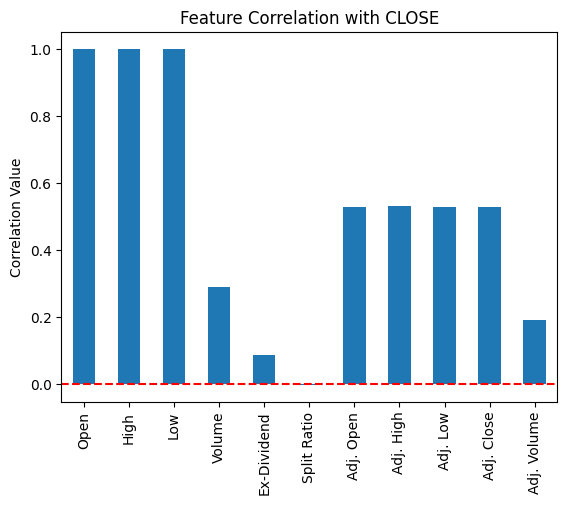

In [ ]:
correlations = X.corrwith(y)
print("\nCorrelation of features with CLOSE:")
print(correlations)
# Plotting the correlations
ax = correlations.plot(kind='bar', title='Feature Correlation with CLOSE')
ax.set_ylabel('Correlation Value')
ax.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference


### Action 5: Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Action 6: Fit a multivariate linear regression model

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Action 7: Display Intercept and Coefficients

In [ ]:
print("\nIntercept:", lr.intercept_)
print("Coefficients:", lr.coef_)


Intercept: 0.21816461617129335
Coefficients: [-6.19945086e-01  8.74393214e-01  7.44820402e-01  3.97517483e-09
  1.14110968e-01 -2.75501840e-01  1.77830791e+00 -2.54630576e+00
 -2.30392156e+00  3.07248700e+00 -2.18352780e-10]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import numpy as np

X = df['Open'].values
Y = df['Close'].values
fx = np.linspace(min(X), max(X), 100)

# Polynomial fit of degree 1
f1 = np.polyfit(X, Y, 1)

# Create DataFrame for visualization
df_viz = df[['Open', 'Close']].copy()
df_viz['Fitted'] = np.poly1d(f1)(X)

fig = px.scatter(df_viz, x='Open', y='Close', title='Linear Regression: Open vs. Close')
fig.add_scatter(x=fx, y=np.poly1d(f1)(fx), mode='lines', name='fitted', line=dict(color='red'))
fig.show()


### Action 8: Calculate R2 score for training and test data

In [ ]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print("\nR2 score for training data:", r2_score(y_train, y_train_pred))
print("R2 score for test data:", r2_score(y_test, y_test_pred))


R2 score for training data: 0.9999667418005952
R2 score for test data: 0.9999598442615222


### Action 9: Create imaginary values for the FEATURES and predict the CLOSE value

In [ ]:
imaginary_FEATURES = [
    [100, 105, 110, 120, 125, 130, 135, 140, 150, 155, 160],
    [105, 110, 115, 125, 130, 135, 140, 145, 155, 160, 165],
    [95, 100, 105, 115, 120, 125, 130, 135, 145, 150, 155]
]
# Function to display the data of predicted value
def analyze_imaginary_features(df, imaginary_FEATURES, lr):
    #imaginary values
    feature_columns = [col for col in df.columns if col not in ['Close', 'Date']]
    imaginary_df = pd.DataFrame(imaginary_FEATURES, columns=feature_columns)
    predicted_CLOSE = lr.predict(imaginary_df)

    colors = ['red', 'blue', 'green']  # Add more colors if you have more imaginary feature sets

    for i, pred in enumerate(predicted_CLOSE):
        imaginary_feature_value = imaginary_FEATURES[i][0]
        print(f"Imaginary FEATURE values {i+1}: {imaginary_feature_value}")
        print(f"Predicted CLOSE value {i+1}: {pred:.2f}")
        print()
    # Create DataFrame for visualization
    df_comparison = pd.DataFrame({
        'Imaginary FEATURE Values': [feature[0] for feature in imaginary_FEATURES],  # Using the first feature value as representative
        'Predicted CLOSE Values': predicted_CLOSE
    })
    # Create scatter plot using plotly express to compare predictions
    fig = px.scatter(df_comparison,
                     x='Imaginary FEATURE Values',
                     y='Predicted CLOSE Values',
                     title='Imaginary FEATURE Values vs. Predicted CLOSE Values')
    fig.show()
# Assuming df, imaginary_FEATURES, and lr are already defined elsewhere in your code
analyze_imaginary_features(df, imaginary_FEATURES, lr)

Imaginary FEATURE values 1: 100
Predicted CLOSE value 1: 104.65

Imaginary FEATURE values 2: 105
Predicted CLOSE value 2: 108.84

Imaginary FEATURE values 3: 95
Predicted CLOSE value 3: 100.46



### Action 10: Re-instantiate the model with fit_intercept set to False and rerun analysis

In [ ]:
lr_no_intercept = LinearRegression(fit_intercept=False)
lr_no_intercept.fit(X.reshape(-1, 1), y)
print("Coefficients without intercept:", lr_no_intercept.coef_)

Coefficients without intercept: [0.99936148]


In [ ]:
lr_no_intercept = LinearRegression(fit_intercept=False)
lr_no_intercept.fit(X_train, y_train)
y_pred_no_intercept = lr_no_intercept.predict(X_test)
from sklearn.metrics import r2_score

# R-squared score for training data
train_score_no_intercept = lr_no_intercept.score(X_train, y_train)

# R-squared score for test data using predicted values
test_score_no_intercept = r2_score(y_test, y_pred_no_intercept)

print(f"R2 score (training) without intercept: {train_score_no_intercept}")
print(f"R2 score (test) without intercept: {test_score_no_intercept}")
print("Coefficients without intercept:", lr_no_intercept.coef_)

R2 score (training) without intercept: 0.9999667275293304
R2 score (test) without intercept: 0.999959859048211
Coefficients without intercept: [-6.20005090e-01  8.74265103e-01  7.45010249e-01  3.78336751e-09
  1.14079846e-01 -6.09778209e-02  1.77691268e+00 -2.54280884e+00
 -2.30281649e+00  3.06932562e+00 -1.81126669e-10]


In [ ]:
# Get predictions
y_pred_train_no_intercept = lr.predict(X_train)
y_pred_test_no_intercept = lr.predict(X_test)
# Combine actual and predicted values for both training and test data into one DataFrame for plotting
df_train = pd.DataFrame({"Actual": y_train, "Predicted": y_pred_train_no_intercept, "Dataset": "Training"})
df_test = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_test_no_intercept, "Dataset": "Test"})
df_combined = pd.concat([df_train, df_test])

# Scatter plot using px
fig = px.scatter(df_combined, x="Actual", y="Predicted", color="Dataset",
                 title="Actual vs. Predicted Values without Intercept",
                 marginal_y="violin", marginal_x="histogram")
# Add diagonal line
fig.add_shape(type="line", line=dict(dash="dash"), x0=min(df_combined["Actual"]), y0=min(df_combined["Actual"]),
              x1=max(df_combined["Actual"]), y1=max(df_combined["Actual"]))

fig.show()

##Task 2 : Clustering

###Action 1: Understanding the dataset and here is the link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

**Credit Card Dataset for Clustering:**
Dataset Size: About 9,000 active credit card holders' data over the last 6 months.

**Attributes:**

**CUST_ID**: Identifier for cardholder.

**BALANCE:** Remaining balance for purchases.

**PURCHASES:** Total purchase amount.

**CASH_ADVANCE:** Prepaid cash amount by user.

**CREDIT_LIMIT:** User's credit card limit.

**PAYMENTS:** Amount paid by user.

**TENURE:** Duration of credit card service.
... (and several other attributes related to purchase frequency, transaction types, etc.)
Objective: Segment credit card holders based on their usage patterns.

###Action 2:  Read data and convert it into a suitable format for clustering.


In [ ]:
# Load the data
credit_card_data = pd.read_csv('/content/drive/MyDrive/CC GENERAL.csv')
credit_card_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# Check for missing values in the dataset function
def check_missing_data(credit_card_data):
  missing_values = credit_card_data.isnull().sum()
  missing_values_percentage = (credit_card_data.isnull().sum() / credit_card_data.shape[0]) * 100
  missing_data = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_values_percentage})
  return missing_data.sort_values(by="Percentage", ascending=False)
check_missing_data(credit_card_data)

,Missing Values,Percentage
MINIMUM_PAYMENTS,313,3.497207
CREDIT_LIMIT,1,0.011173
CUST_ID,0,0.000000
BALANCE,0,0.000000
PRC_FULL_PAYMENT,0,0.000000
PAYMENTS,0,0.000000
PURCHASES_TRX,0,0.000000
CASH_ADVANCE_TRX,0,0.000000
CASH_ADVANCE_FREQUENCY,0,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.000000


In [ ]:
# Impute missing values using the median
credit_card_data['MINIMUM_PAYMENTS'].fillna(credit_card_data['MINIMUM_PAYMENTS'].median(), inplace=True)
credit_card_data['CREDIT_LIMIT'].fillna(credit_card_data['CREDIT_LIMIT'].median(), inplace=True)
# Using the function that i create above to check if all missing values are handled
check_missing_data(credit_card_data)

,Missing Values,Percentage
CUST_ID,0,0.0
BALANCE,0,0.0
PRC_FULL_PAYMENT,0,0.0
MINIMUM_PAYMENTS,0,0.0
PAYMENTS,0,0.0
CREDIT_LIMIT,0,0.0
PURCHASES_TRX,0,0.0
CASH_ADVANCE_TRX,0,0.0
CASH_ADVANCE_FREQUENCY,0,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.0


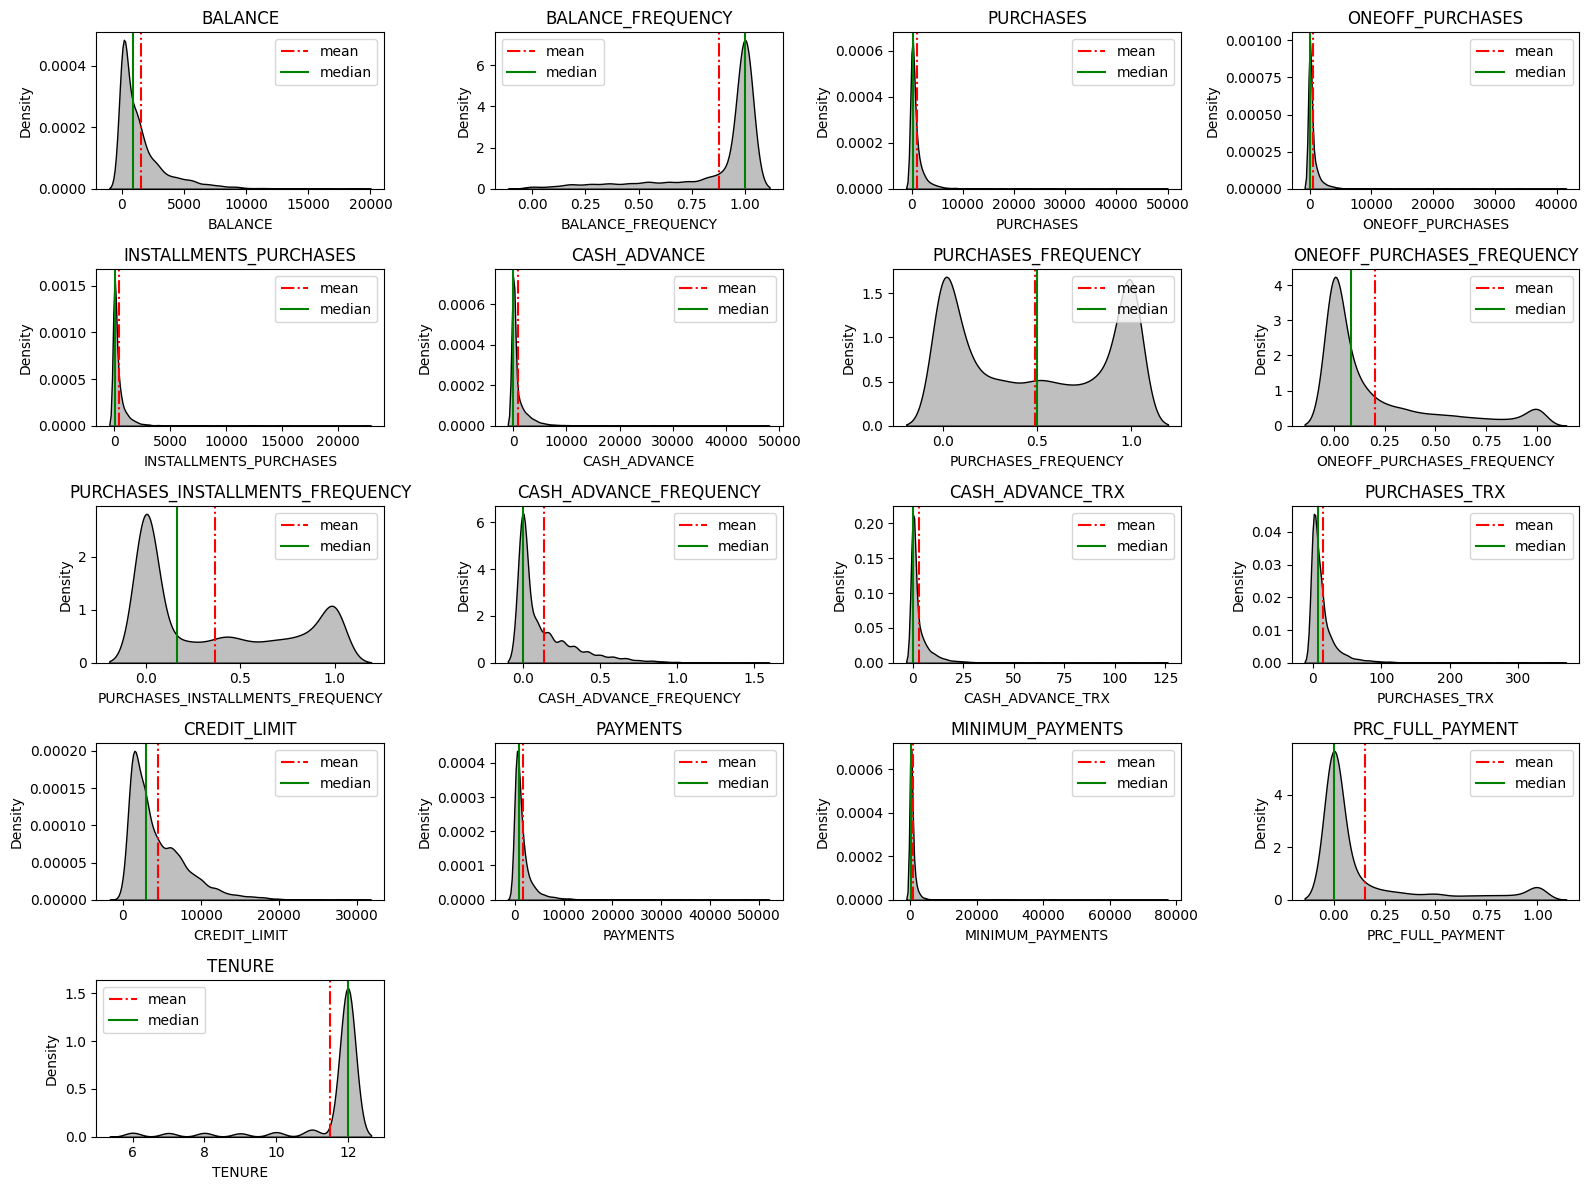

In [ ]:
# Initialize the figure size again
plt.figure(figsize=(16, 12))

# Iterate over numerical columns and plot their distributions using the updated parameter
for index, col in enumerate(credit_card_data.select_dtypes(include=[float, int]).columns):
    plt.subplot(5, 4, index+1)
    sns.kdeplot(credit_card_data[col], fill=True, color='k')
    plt.axvline(credit_card_data[col].mean(), label='mean', linestyle='-.', color='r')
    plt.axvline(credit_card_data[col].median(), label='median', linestyle='-', color='g')
    plt.legend()
    plt.title(col)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [ ]:
# Drop the CUST_ID column as it's just an identifier and won't contribute to the clustering process.
data_scaled = credit_card_data.drop(columns=['CUST_ID'])

# Scale the features: Clustering algorithms, especially those based on distance metrics
# (like k-means), can be sensitive to the scale of the data. Scaling ensures all features
# have a similar scale, making the clustering process more accurate.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_scaled)

###Action 3: For the k-means clustering algorithm, what will be value of “n_clusters” parameter. Perform the clustering using the K-means algorithm.


Determine the Optimal Number of Clusters (n_clusters)

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the sum of squared distances for a range of k values
sum_of_squared_distances = []
silhouette_scores = []
# We will calculate the sum of squared distances for k values ranging from 1 to 14.
# This range is chosen to give us a broad overview of how the sum of squared distances decreases as k increases.
K = range(1, 15)
for k in K:
    # Initialize the KMeans algorithm with the current value of k
    km = KMeans(n_clusters=k, n_init=10)
    # Fit the algorithm to our scaled data
    km = km.fit(data_scaled)
    # Append the inertia value to our list
    sum_of_squared_distances.append(km.inertia_)

    # Calculate silhouette score and append to list (only for k > 1)
    if k > 1:
        silhouette_avg = silhouette_score(data_scaled, km.labels_)
        silhouette_scores.append(silhouette_avg)
# Plotting the elbow curve
fig = px.line(x=K, y=sum_of_squared_distances,
              labels={'x': 'k (number of clusters)', 'y': 'Sum of squared distances'},
              title='Elbow Method For Optimal k',
              markers='x',
              color_discrete_sequence=['blue'])
fig.show()

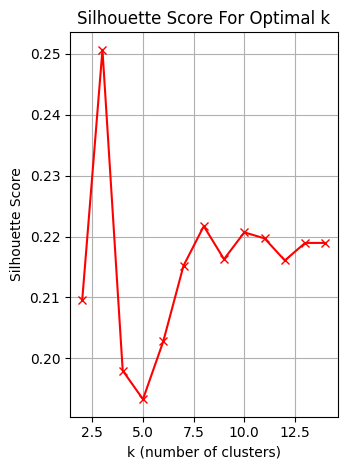

In [ ]:
# Plotting the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K[1:], silhouette_scores, 'rx-')  # Notice K[1:] since silhouette scores start from k=2
plt.xlabel('k (number of clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Find the optimal number of clusters based on the highest silhouette score
optimal_k_silhouette = K[1:][silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters based on the highest silhouette score is: {optimal_k_silhouette}")
print(f"Highest Silhouette Score: {max(silhouette_scores)}")


The optimal number of clusters based on the highest silhouette score is: 3
Highest Silhouette Score: 0.2506886512213055


###Action 4: Plot the data for estimated clusters with different colour-coding.


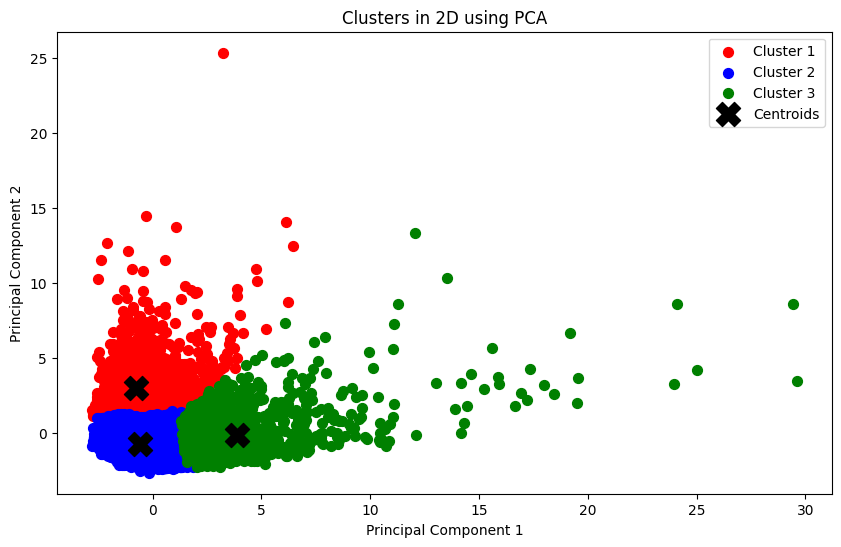

In [ ]:
from sklearn.decomposition import PCA

# Reduce the data into 2D using PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=optimal_k_silhouette, n_init=10)
y_kmeans = kmeans.fit_predict(data_scaled)

# Plot the 2D data points with color-coded clusters
plt.figure(figsize=(10,6))

colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black', 'grey', 'purple', 'orange']  # Colors for up to 10 clusters, add more if needed

for i in range(optimal_k_silhouette):
    plt.scatter(principal_components[y_kmeans == i, 0], principal_components[y_kmeans == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')

# Plot the cluster centroids in the PCA reduced space
# First, transform the centroids using the PCA transformation
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='black', marker='X', label='Centroids')

plt.title('Clusters in 2D using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


##Task 3: Data Classification

###Action 1: Understand what the data is about. Here is the link:
https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

**Breast Cancer Wisconsin (Diagnostic) Dataset:**


**Origin**: From digitized images of breast mass fine needle aspirates.

**Attributes**:
**Diagnosis**: Tumor type (M = malignant, B = benign).

**Features**: 30 real-valued metrics from cell nuclei, including mean, standard error, and "worst" values for 10 measurements.

**Purpose**: To predict tumor type (benign or malignant) based on nuclear features.

**Size**: 569 instances (357 benign and 212 malignant).
Relevance: Aids in early breast cancer diagnosis.

**Feature 30:** ID, Diagnosis, radius1, texture1, perimeter1, area1, smoothness1, compactness1, concavity1, concave_points1, symmetry1, fractal_dimension1, radius2, texture2, perimeter2, area2, smoothness2, compactness2, concavity2, concave_points2, symmetry2, fractal_dimension2, radius3, texture3, perimeter3, area3, smoothness3, compactness3, concavity3, concave_points3, symmetry3, fractal_dimension3

###Action 2: Read the data from the CSV file and convert it into a suitable format for classification by separating them into X and y

In [ ]:
#Load the data
dataClassfication = pd.read_csv("/content/drive/MyDrive/wdbc.data", header=None)
column_names = [
    "ID", "Diagnosis", "radius1", "texture1", "perimeter1", "area1",
    "smoothness1", "compactness1", "concavity1", "concave_points1",
    "symmetry1", "fractal_dimension1", "radius2", "texture2", "perimeter2",
    "area2", "smoothness2", "compactness2", "concavity2", "concave_points2",
    "symmetry2", "fractal_dimension2", "radius3", "texture3", "perimeter3",
    "area3", "smoothness3", "compactness3", "concavity3", "concave_points3",
    "symmetry3", "fractal_dimension3"
]
dataClassfication.columns = column_names
X = dataClassfication.drop(columns=["ID", "Diagnosis"])
y = dataClassfication["Diagnosis"].values

In [ ]:
#Separate into X & y
# Using the user's provided column names to separate the dataset into features and target label
X = dataClassfication.drop(columns=["ID", "Diagnosis"])
#Convert the y into the values
y = dataClassfication["Diagnosis"].values
#Display the values of X and y
X.head(), y[:5]

(   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
 0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
 1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
 2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
 3    11.42     20.38       77.58   386.1      0.14250       0.28390   
 4    20.29     14.34      135.10  1297.0      0.10030       0.13280   
 
    concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
 0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
 1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
 2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
 3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
 4      0.1980          0.10430     0.1809             0.05883  ...    22.54   
 
    texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
 0     17

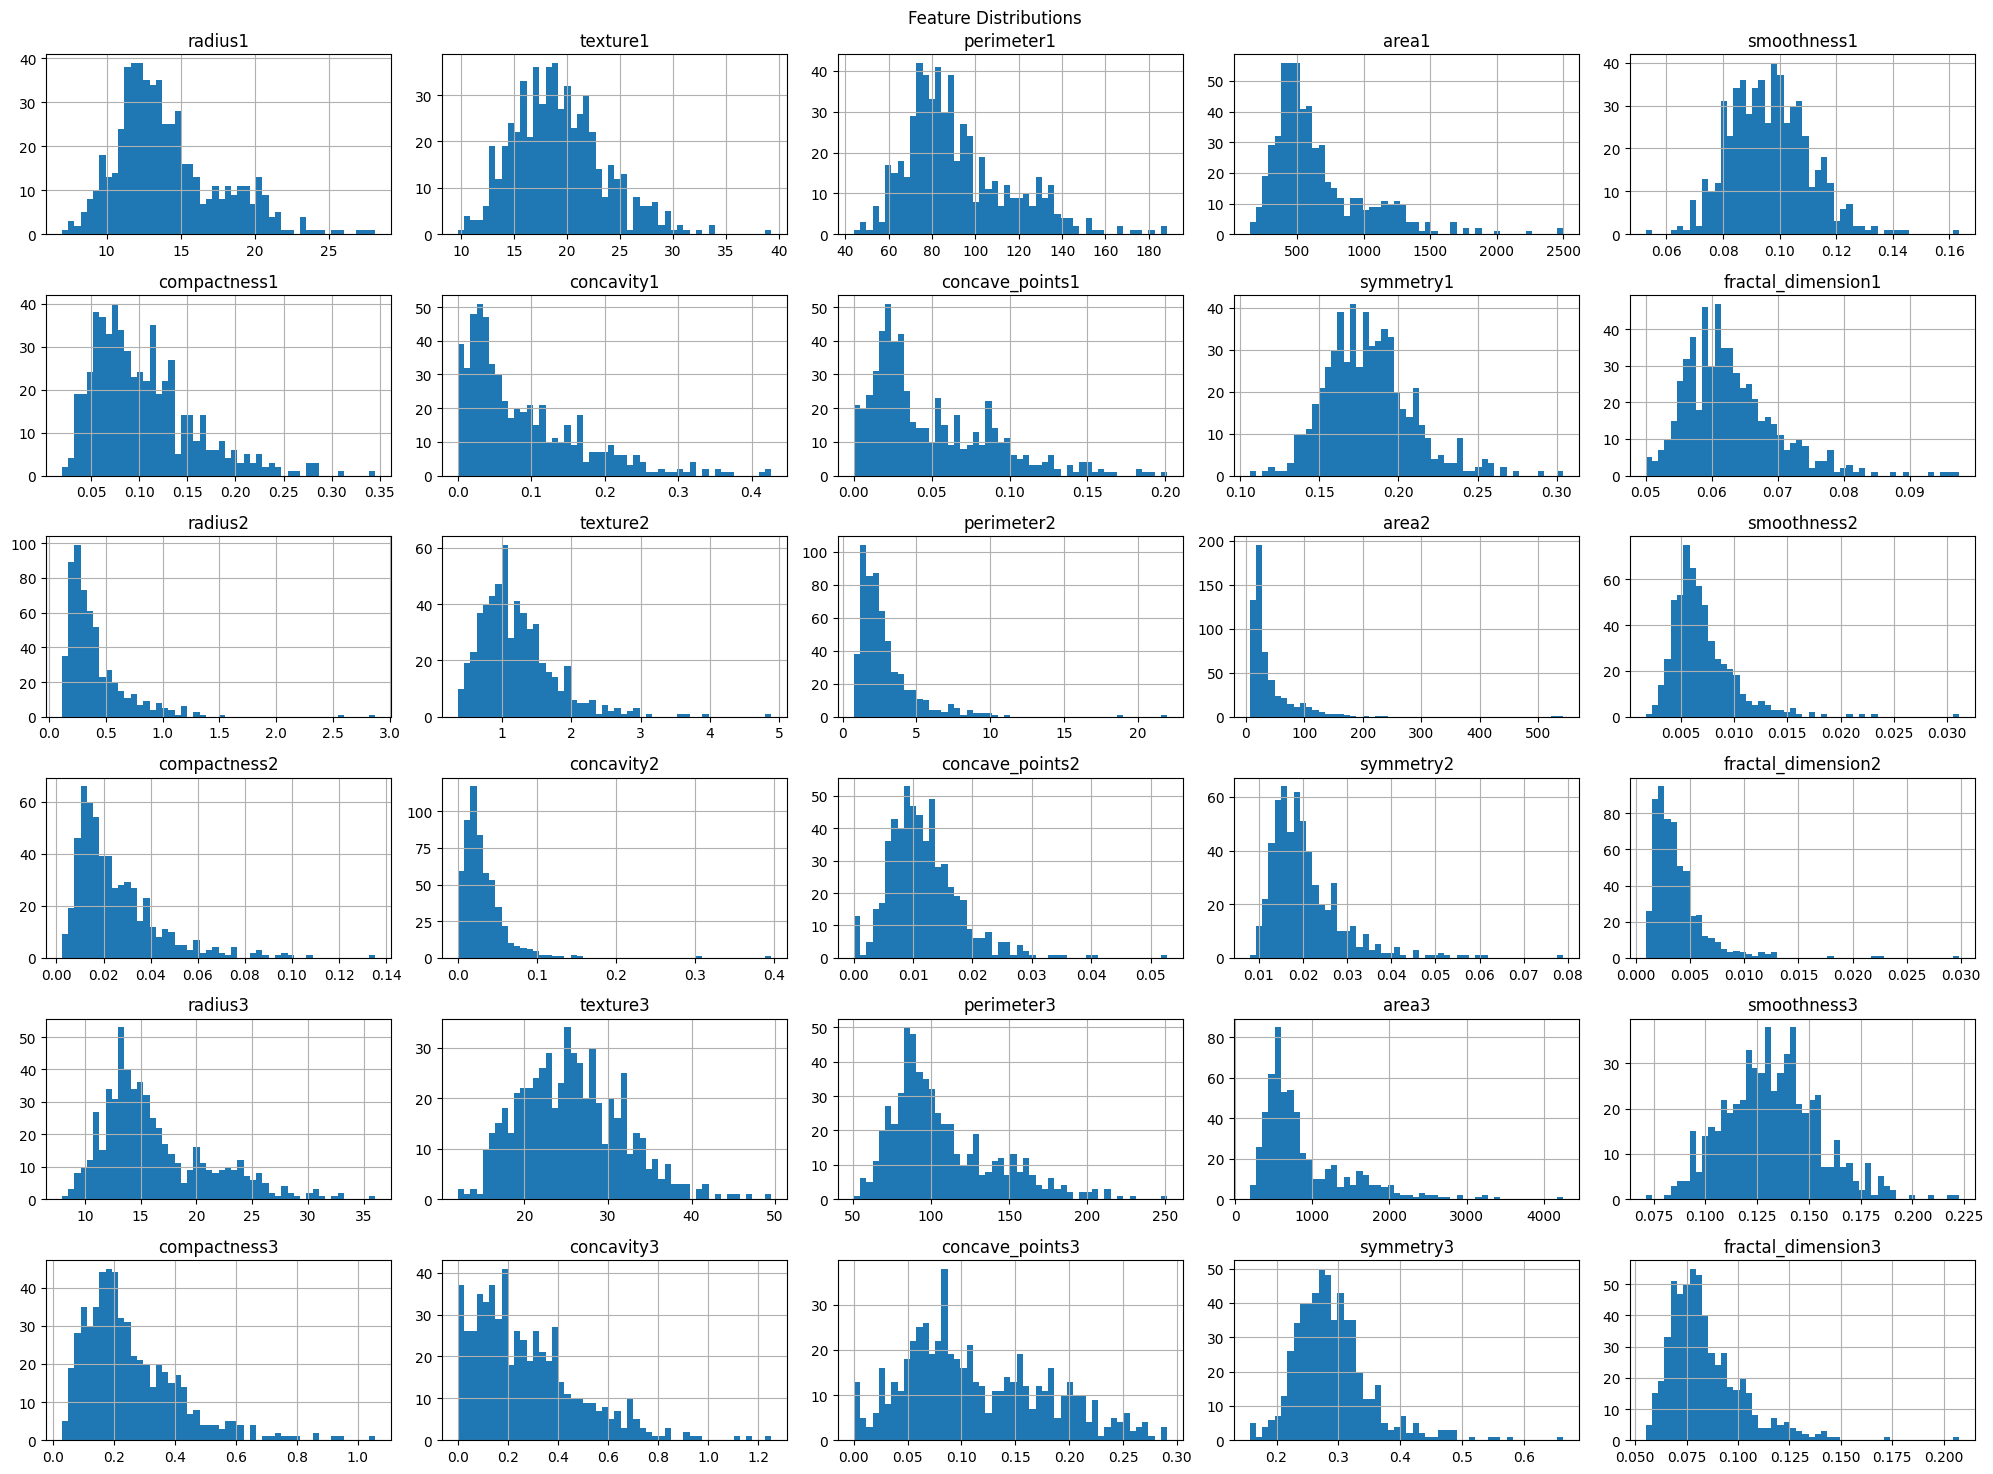

In [ ]:
# Histogram for each feature
dataClassfication.drop(columns=["ID", "Diagnosis"]).hist(figsize=(20, 15), bins=50)
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

###Action 3: Split the data into Training and Testing using the ration of 73% : 27% respectively.

In [ ]:
# Splitting the data into training and testing sets with a 73:27 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=42)

# Checking the sizes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((415, 30), (154, 30), (415,), (154,))

###Action 4: Scale the data using the StandardScaler class from “scikit-learn” library

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the testing data
X_test_scaled = scaler.transform(X_test)

# Displaying the first 5 rows of the scaled training data
#X_train_scaled[:5]

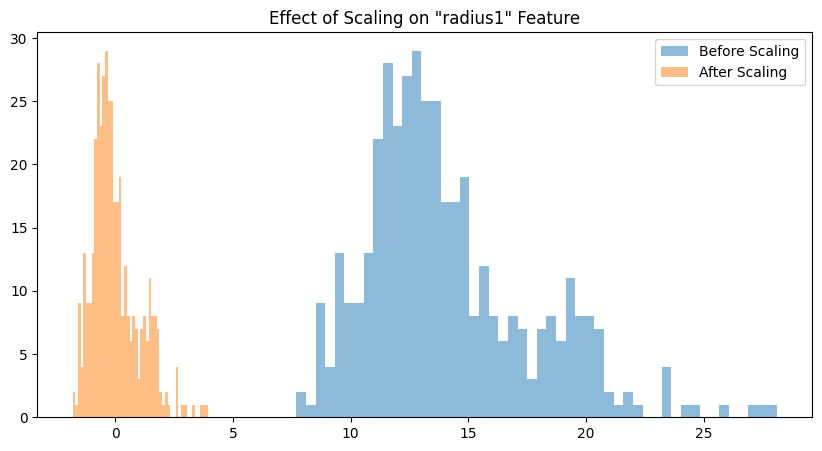

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(X_train['radius1'], bins=50, alpha=0.5, label='Before Scaling')
plt.hist(X_train_scaled[:, column_names.index('radius1')-2], bins=50, alpha=0.5, label='After Scaling')  # -2 because we dropped 'ID' and 'Diagnosis'
plt.legend()
plt.title('Effect of Scaling on "radius1" Feature')
plt.show()

###Action 5: Train a logistic regression model and estimate its performance on the test data

In [ ]:
# Initialize the Logistic Regression model with a maximum iteration parameter set to 10,000
log_reg = LogisticRegression(max_iter=10000)

# Train the model using the scaled training data
log_reg.fit(X_train_scaled, y_train)

# Use the trained model to make predictions on the scaled test data
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Calculate and store the accuracy of the predictions
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
#Display the accuracy
print("Predictions accuracy: ",accuracy_log_reg)

Predictions accuracy:  0.9805194805194806


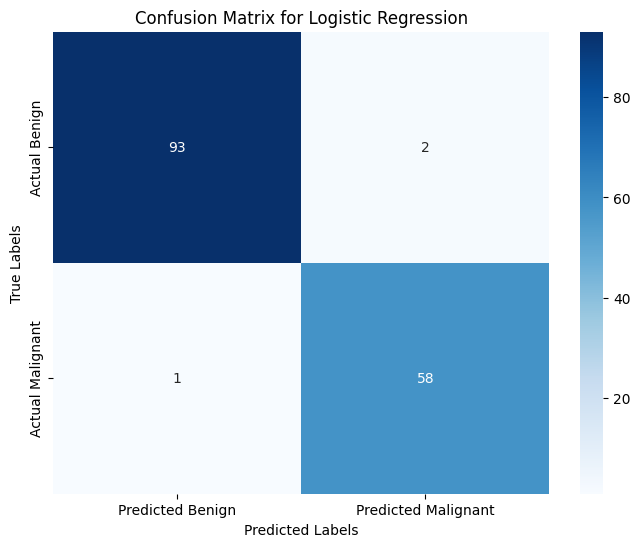

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            # Model's predictions
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            # True labels from test data
            yticklabels=['Actual Benign', 'Actual Malignant'])

# Set the title and axis labels
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()


###Action 6: Train a K-nearest neighbours model with the training data and estimate its performance on the test data

In [ ]:
# Initialize the K-nearest neighbours model
knn = KNeighborsClassifier()

# Train the model using the scaled training data
knn.fit(X_train_scaled, y_train)

# Use the trained model to make predictions on the scaled test data
y_pred_knn = knn.predict(X_test_scaled)

# Calculate the accuracy of the predictions
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)


print("Accuracy: ", accuracy_knn)

Accuracy:  0.961038961038961


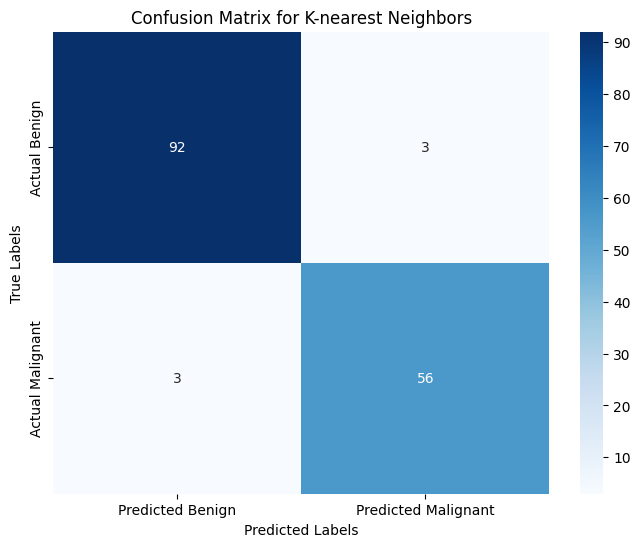

In [ ]:
# Setting up the visualization
plt.figure(figsize=(8, 6))

# Plotting the confusion matrix using a heatmap
sns.heatmap(conf_matrix_knn, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])

plt.title('Confusion Matrix for K-nearest Neighbors')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

###Action 7: Compare the results of two algorithms

In [ ]:
#Model Comparison using plotly.express
#Visualize Comparesion logistic regression and K-nearest Neighbours
model_comparison = {
    'Model': ['Logistic Regression', 'KNN'],
    'Accuracy': [accuracy_log_reg, accuracy_knn],
    'Color': ['Logistic Regression (Blue)', 'KNN (Red)']  # Labeling the colors
}
fig = px.bar(model_comparison, x='Model', y='Accuracy', title='Model Comparison (Accuracy)', color='Color', range_y=[0, 1])
fig.show()


##Task 4:	Principal Component Analysis

###Action 1: Understand the dataset by using the information from the below link and briefly describing it.
Here is the link :
https://archive.ics.uci.edu/dataset/109/wine

**Origin**: The dataset contains results from a chemical analysis of wines from the same region in Italy but from three different cultivars (varieties).

**Objective**: To classify wines based on their chemical constituents.

**Attributes** (Total: 13):

**Alcohol**: Alcohol content in wine.

**Malic_acid**: Amount of malic acid.

**Ash**: Residual after incineration.

**Alcalinity_of_ash**: Measure of alkalinity.

**Magnesium**: Amount of magnesium.

**Total_phenols**: Total amount of phenols.

**Flavanoids**: Subset of phenols.

**Nonflavanoid_phenols**: Phenols that aren't flavanoids.

**Proanthocyanins**: Type of flavanoid.

**Color_intensity**: Intensity of color.

**Hue**: Color shade.

**OD280/OD315_of_diluted_wines**: Measure related to wine's color and clarity.

**Proline**: Amino acid related to wine's taste.

**Classes**: There are 3 distinct classes indicating the type of wine.

**Missing Values**: None.

**Utility**: It's a well-posed classification problem with clear class structures, suitable for testing new classifiers.



###Action 2: Read data and convert it into a suitable format for feature selection

In [ ]:
#import the data into wine_data variable
wine_data = pd.read_csv("/content/drive/MyDrive/wine.data")
# Rename the columns based on the provided attribute information
column_names = [
    "class",
    "Alcohol",
    "Malic_acid",
    "Ash",
    "Alcalinity_of_ash",
    "Magnesium",
    "Total_phenols",
    "Flavanoids",
    "Nonflavanoid_phenols",
    "Proanthocyanins",
    "Color_intensity",
    "Hue",
    "OD280/OD315_of_diluted_wines",
    "Proline"
]

wine_data.columns = column_names

# Display the updated dataset with the new column names
wine_data.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [ ]:
# Separate the data into features and target labels
X = wine_data.drop("class", axis=1)
y = wine_data["class"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Return the shape of the standardized data to confirm the transformation
X_standardized.shape, y.shape

((177, 13), (177,))

###Action 3: Perform PCA-based feature selection analysis using ‘n_components=2’

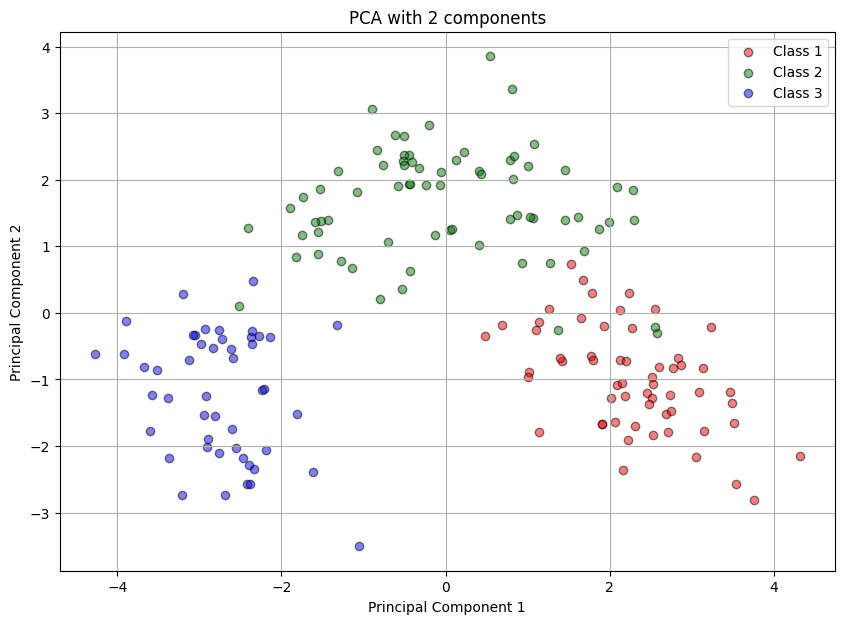

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Visualize the data in the new two-dimensional space
plt.figure(figsize=(10, 7))
for label, color in zip(y.unique(), ['red', 'green', 'blue']):
    mask = y == label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=color, label=f"Class {label}", alpha=0.5, edgecolor='k')

plt.title('PCA with 2 components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


###Action 4.	Using the reduced features, perform classification using Logistic regression

In [ ]:
# Training the Logistic Regression classifier on reduced features
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# Predicting on the test set and evaluating the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.9166666666666666

###Action 5: Plot the results in a scatter plot using different colour codes

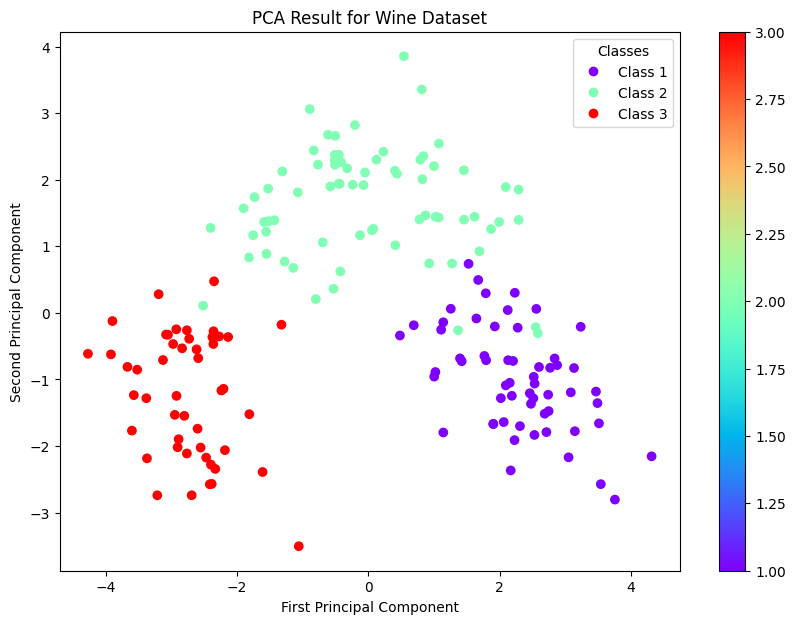

In [ ]:
# Create a scatter plot with labeled colors
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Result for Wine Dataset')

# Create a legend with class labels
classes = [1, 2, 3]  # Assuming class labels are 1, 2, and 3
legend_labels = [f'Class {cls}' for cls in classes]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Classes')

plt.colorbar()
plt.show()

This 3d Visulization for extra mark hopefully

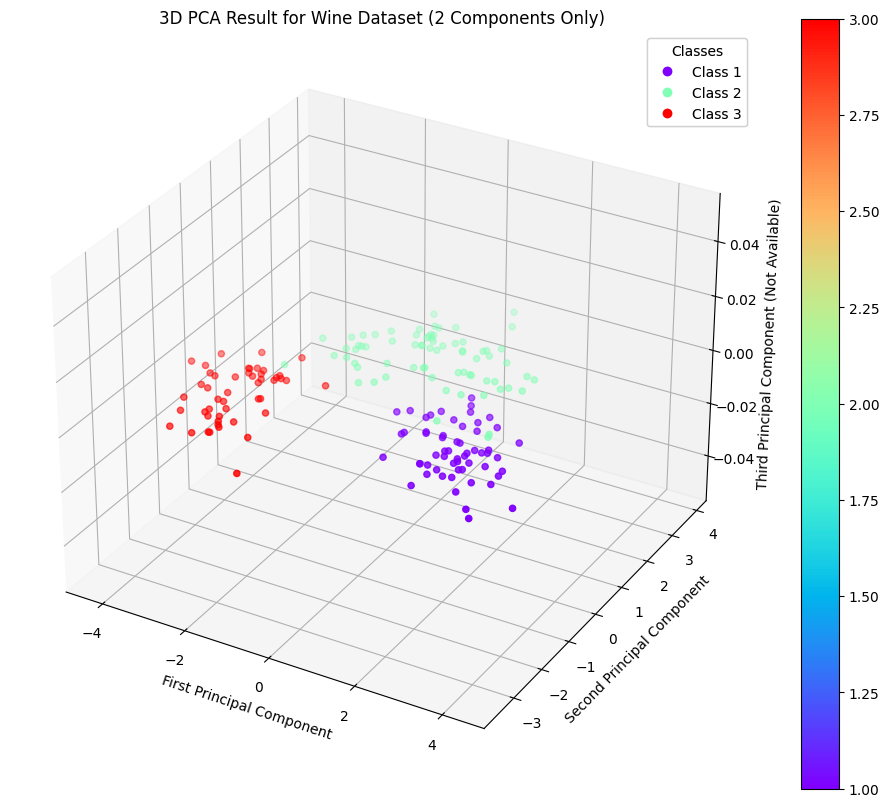

In [ ]:
# Create a 3D scatter plot with labeled colors using the first two principal components
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow')

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component (Not Available)')
ax.set_title('3D PCA Result for Wine Dataset (2 Components Only)')

# Create a legend with class labels
classes = [1, 2, 3]  # Assuming class labels are 1, 2, and 3
legend_labels = [f'Class {cls}' for cls in classes]
legend = ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Classes')
ax.add_artist(legend)

plt.colorbar(scatter)
plt.show()
